In [1]:
pwd

'/home/wsuser/work'

In [4]:
!pip install tensorflow
# !pip install keras==2.2.4

     |████████████████████████████████| 1.3 MB 14.3 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


In [15]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nZwaQ3bXf7aulVbSlgB0T3lgUXjzVME_ENOm2UrnKia4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'agesturebasedtoolforsterilebrowsi-donotdelete-pr-ahlrdk5m7icspf'
object_key = 'Dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [16]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [17]:
pwd

'/home/wsuser/work'

In [18]:
traindatagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [19]:
testdatagen = ImageDataGenerator(rescale=1./255)

In [20]:
x_train = traindatagen.flow_from_directory('/home/wsuser/work/Dataset/train',target_size=(64,64),batch_size=5,color_mode='grayscale',class_mode='categorical')

Found 594 images belonging to 6 classes.


In [22]:
x_test = testdatagen.flow_from_directory('/home/wsuser/work/Dataset/test',target_size=(64,64),batch_size=5,color_mode='grayscale',class_mode='categorical')

Found 30 images belonging to 6 classes.


In [23]:
model = Sequential()


In [24]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

In [25]:


model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=6,activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:

import tensorflow as tf
tf . print(tf. __version__)


2.7.2


In [29]:
model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=20,
validation_data=x_test,validation_steps=len(x_test))

/tmp/wsuser/ipykernel_164/1633189495.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=20,


Epoch 1/20
119/119 [==============================] - 8s 60ms/step - loss: 1.5149 - accuracy: 0.3838 - val_loss: 0.8015 - val_accuracy: 0.7333
Epoch 2/20
119/119 [==============================] - 7s 55ms/step - loss: 0.6870 - accuracy: 0.7424 - val_loss: 0.6972 - val_accuracy: 0.7000
Epoch 3/20
119/119 [==============================] - 6s 51ms/step - loss: 0.4648 - accuracy: 0.8165 - val_loss: 0.5137 - val_accuracy: 0.7667
Epoch 4/20
119/119 [==============================] - 5s 44ms/step - loss: 0.3635 - accuracy: 0.8586 - val_loss: 0.4507 - val_accuracy: 0.8333
Epoch 5/20
119/119 [==============================] - 5s 44ms/step - loss: 0.2614 - accuracy: 0.9024 - val_loss: 0.3475 - val_accuracy: 0.9000
Epoch 6/20
119/119 [==============================] - 5s 45ms/step - loss: 0.2565 - accuracy: 0.9024 - val_loss: 0.4776 - val_accuracy: 0.8333
Epoch 7/20
119/119 [==============================] - 5s 42ms/step - loss: 0.1610 - accuracy: 0.9478 - val_loss: 0.5410 - val_accuracy: 0.8333

In [30]:
model.save('gesture.h5')

In [31]:
!tar -zcvf Number_gesture_classifier_new.tgz gesture.h5 

gesture.h5


In [32]:
ls -1

Dataset/
gesture.h5
Number_gesture_classifier_new.tgz


In [33]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 15.6 MB/s eta 0:00:01


In [42]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"gE076jds2asxXK8dk6ZLLC1bw4kp3iSe_97D9dao4arr"
    
}
client = APIClient(wml_credentials)

In [43]:
client = APIClient(wml_credentials)

In [48]:
def guide_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return (next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [52]:
space_uid = guide_from_space_name(client,"GestureModel")
space_uid

'f9fd3717-7ae4-4764-b7d3-79d2881a2de7'

In [54]:
client.set.default_space(space_uid)

'SUCCESS'

In [55]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [68]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [70]:
model_details=client.repository.store_model(model='Number_gesture_classifier_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/ibm_watson_machine_learning/repository.py:1453: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [71]:
model_id

'a8393184-0aff-4a98-a9dd-e0ffc2172ade'

In [72]:
client.repository.download(model_id,'gesture_model.tar.gz')

Successfully saved model content to file: 'gesture_model.tar.gz'


'/home/wsuser/work/gesture_model.tar.gz'

In [39]:
model_json = model.to_json()

In [40]:
with open('model-bw.json',"w") as json_file:
    json_file.write(model_json)

In [41]:
model = load_model('gesture.h5')

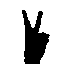

In [42]:
img = image.load_img('Dataset/test/2/3.jpg',grayscale=True,target_size=(64,64))
img

In [43]:

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)
pred

1/1 [==============================] - 0s 46ms/step


array([2])

In [44]:
index = ['0','1','2','3','4','5']
res = str(index[pred[0]])
res

'2'